In [60]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\Mall_Customers.csv")
print(df.shape)
df.head()

(250, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


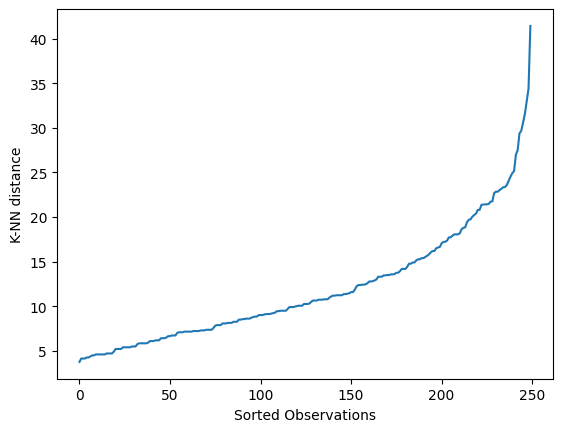

In [63]:
nbrs = NearestNeighbors(n_neighbors=4).fit(X)
n_dist, n_index = nbrs.kneighbors(X)
sort_nbrs_dist = np.sort(n_dist, axis=0)

k_dist = sort_nbrs_dist[:, 3]
plt.plot(k_dist)
plt.ylabel("K-NN distance")
plt.xlabel("Sorted Observations")
plt.show()

23.345235059857504


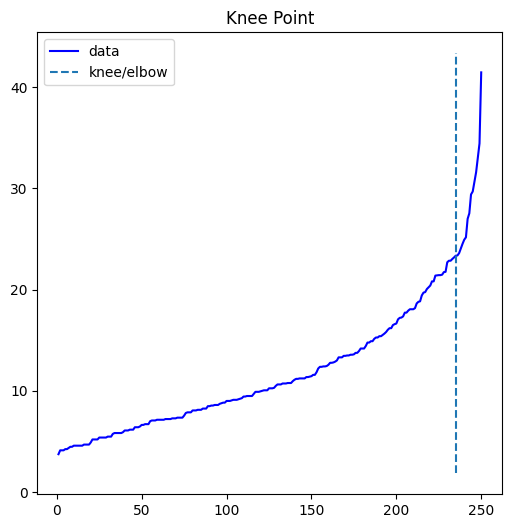

In [64]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(n_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [65]:
dbs = DBSCAN(eps=12.5, min_samples=4).fit(X)
db_ds = X.copy()
db_ds.loc[:, 'Cluster'] = dbs.labels_

In [66]:
db_ds.Cluster.value_counts().to_frame().reset_index()

,Cluster,count
0,0,112
1,-1,63
2,2,34
3,3,24
4,1,8
5,5,5
6,4,4


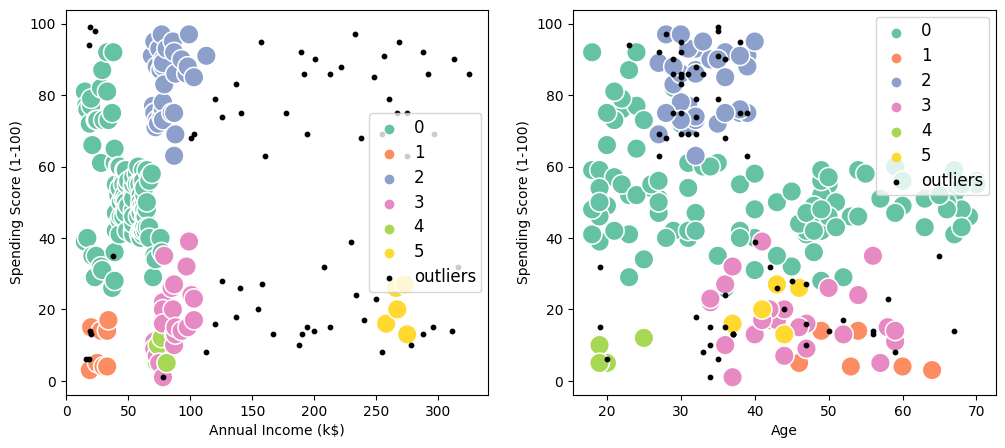

In [68]:
outliers = db_ds[db_ds['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sb.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',

                data=db_ds[db_ds['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sb.scatterplot(x = 'Age', y = 'Spending Score (1-100)',

                data=db_ds[db_ds['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()